# The Monte Carlo method

The Monte Carlo method is a computational technique that uses <font color='orange'>random sampling</font> to estimate complex mathematical outcomes or solve problems that might be <font color='orange'>deterministic</font> in nature.

The name “Monte Carlo” for the Monte Carlo methods has an origin that ties back to the famous Monte Carlo Casino located in Monaco. This name was not chosen because of any direct association with the mathematical principles behind these methods, but rather for its metaphorical connection to randomness and chance, which are central elements in both gambling and Monte Carlo simulations.

Let us consider the example of computing of an integral of a function. This is a deterministic problem, but we will solve it using random sampling. Assume we want to find value of the integral

$$\int_a^b f(x)dx. $$

Monte Carlo integration estimates this integral by finding the fraction of random points that fall below $f(x)$.

The convergence of Monte Carlo integration is $\mathcal{O}(n^{1/2})$ and is independent of the dimensionality. Hence, Monte Carlo integration generally beats numerical intergration for moderate- and high-dimensional integration since numerical integration (quadrature) converges as $\mathcal{O}(n^d)$!

## Computing the integral $\int_0^1 e^x dx$

Estimate the integral $\int_0^1 e^x dx$ using Monte Carlo integration.

`````{admonition} Group Task
:class: tip
Compute this intergral before we proceed to see how Monte Carlo soves it.
`````

In [50]:
import random
import math
import numpy as np
import jax.numpy as jnp
import scipy.stats as stats

import matplotlib.pyplot as plt
import matplotlib.patches as patches

1.630969
1.5222379
1.5657302
1.8136375
1.7423098
1.7120391
1.7192066
1.7177035
1.718586


1.717916


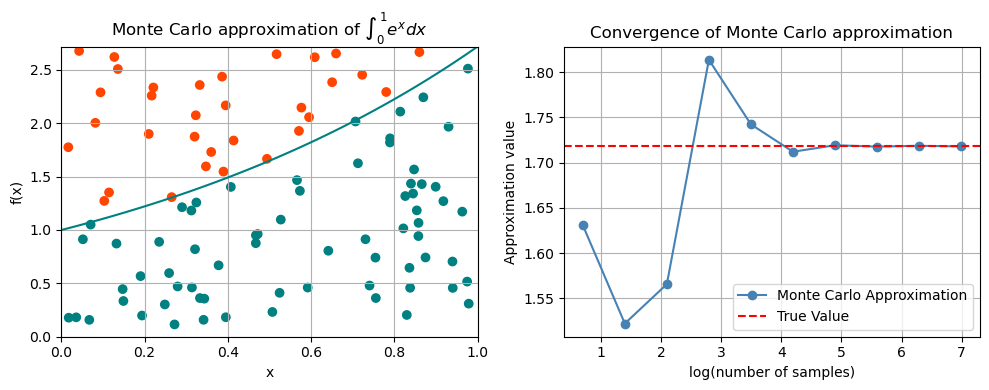

In [51]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4), dpi=100)

# Plot function and Monte Carlo samples
x = jnp.linspace(0, 1, 100)
axs[0].plot(x, jnp.exp(x), color='teal')
pts = np.random.uniform(0, 1, (100, 2))
pts[:, 1] *= jnp.e
cols = ['teal'] * 100
for i in range(100):
    if pts[i, 1] > jnp.exp(pts[i, 0]):     # acceptance / rejection step
        cols[i] = 'orangered'
axs[0].scatter(pts[:, 0], pts[:, 1], c=cols)
axs[0].set_xlim([0, 1])
axs[0].set_ylim([0, jnp.e])
axs[0].grid(True)
axs[0].set_xlabel('x')
axs[0].set_ylabel('f(x)')
axs[0].set_title('Monte Carlo approximation of $\int_0^1 e^x dx$')

# Monte Carlo approximation
n_values = 5**np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
results = []
for n in n_values:
    pts = np.random.uniform(0, 1, (n, 2))
    pts[:, 1] *= jnp.e
    count = jnp.sum(pts[:, 1] < jnp.exp(pts[:, 0]))
    volume = jnp.e * 1  # volume of region
    sol = (volume * count) / n
    print(sol)
    results.append(sol)

# Convergence plot
axs[1].plot(np.log10(n_values), results, marker='o', color='steelblue')
axs[1].axhline(y=jnp.exp(1) - jnp.exp(0), color='red', linestyle='--')
axs[1].set_xlabel('log(number of samples)')
axs[1].set_ylabel('Approximation value')
axs[1].grid(True)
axs[1].set_title('Convergence of Monte Carlo approximation')
axs[1].legend(['Monte Carlo Approximation', 'True Value'], loc='lower right')

plt.tight_layout()
plt.show()


`````{admonition} Group Task
:class: tip
Rerun the experiemnt above several times. Do you always get the same path for the Monte Carlo approximation?
`````

## The Monte Carlo method - computing $\pi$

We can also use Monte Carlo to estimate the value of π!

In [52]:
def in_circle(x, y, r):
    # is point (x,y) within circle of radius r?
    return jnp.sqrt(x**2 + y**2) <= r

def approx_pi(r, n):
    xs, ys, cols = [], [], []

    count = 0

    for i in range(n):
        x = np.random.uniform(0, r, 1)
        y = np.random.uniform(0, r, 1)
        xs.append(x)
        ys.append(y)

        if in_circle(x, y, r):
            count += 1
            cols.append("orangered")
        else:
            cols.append("teal")

    pi_appr = round(4 * count / n, 3)

    plt.figure(figsize=(6, 4))
    plt.scatter(xs, ys, c=cols, s=20, alpha=0.5)
    plt.title("Monte Carlo approximation of π = " + str(pi_appr))
    plt.annotate(f"Points inside circle: {count}/{n}", xy=(0.5, 0.9), xycoords='axes fraction', ha='center')
    plt.annotate(f"Approximated π ≈ {pi_appr}", xy=(0.5, 0.85), xycoords='axes fraction', ha='center')
    plt.xlabel("x")
    plt.ylabel("y")
    plt.grid(True)
    plt.axis('equal')
    plt.show()

    return pi_appr

Let us iterate $n$ through values $5*10^1, 5*10^2, 5*10^3$ and run the function approximating $\pi$. How does the result change?

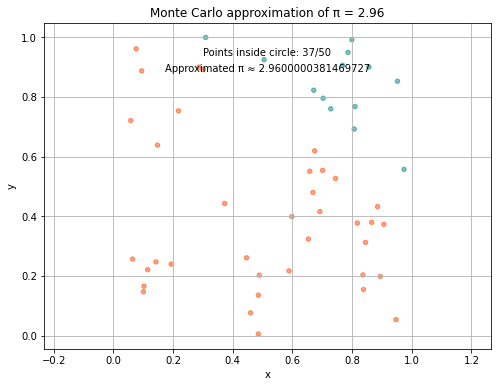

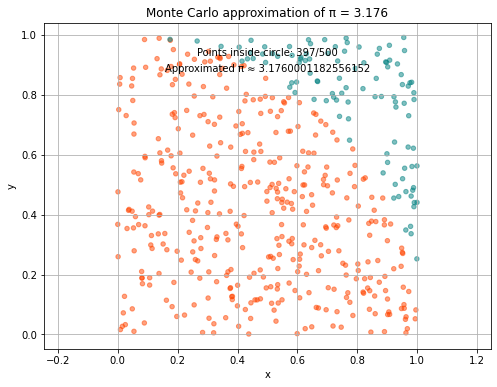

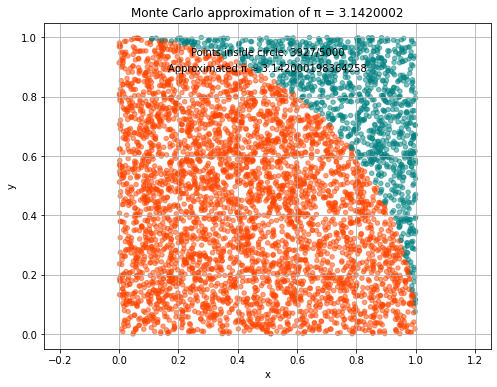

In [53]:
r = 1

for n in 5 * 10**jnp.array([1, 2, 3]):
    approx_pi(r, n)


## Buffon's needle problem

Here is another interesting example where random number generation can help us solve an analytical problem.

Buffon's Needle is a classic probability problem that involves randomly dropping a needle of a certain length onto a floor with parallel lines drawn at regular intervals. The goal is to estimate the probability that the needle will intersect one of the lines. The probability can be calculated using the following formula:

$$
P = \frac{2L}{\pi d}
$$

Where $P$  is the estimated probability of the needle intersecting a line, $L$  is the length of the needle, $d$  is the distance between the lines on the floor.

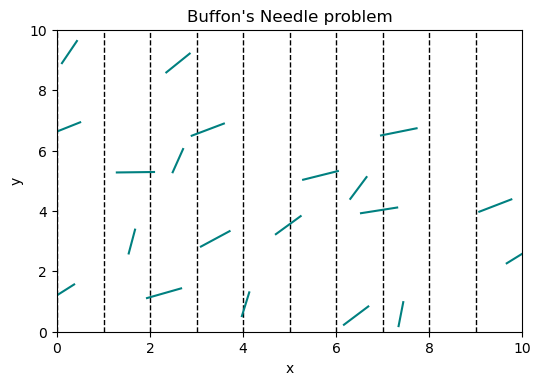

In [54]:
# Visualise Buffon's needle problem
num_lines = 10       # Number of parallel lines
line_spacing = 1.0   # Distance between lines
needle_length = 0.8  # Length of the needle
num_needles = 20     # Number of needles to drop

# Create a figure and axis for visualization
fig = plt.figure(dpi=100, figsize=(6, 4))

# Draw the parallel lines vertically
for i in range(num_lines):
    line_x = i * line_spacing
    plt.axvline(x=line_x, color='black', linewidth=1, linestyle='--')

# Simulate dropping needles and visualize them
for _ in range(num_needles):
    # Randomly choose a midpoint and an angle for the needle
    mid_point_x = random.uniform(0, num_lines * line_spacing)
    mid_point_y = random.uniform(0, num_lines * line_spacing)
    angle = random.uniform(0, math.pi / 2)

    # Calculate the endpoints of the needle
    x0 = mid_point_x - (needle_length / 2) * math.cos(angle)
    x1 = mid_point_x + (needle_length / 2) * math.cos(angle)
    y0 = mid_point_y - (needle_length / 2) * math.sin(angle)
    y1 = mid_point_y + (needle_length / 2) * math.sin(angle)

    # Plot the needle as a line segment
    plt.plot([x0, x1], [y0, y1], color='teal')

# Set plot limits and labels
plt.xlim([0, num_lines * line_spacing])
plt.ylim([0, num_lines * line_spacing])
plt.xlabel('x')
plt.ylabel('y')
plt.title("Buffon's Needle problem")

# Show the plot
plt.show()

Let's write Python code to simulate Buffon's Needle experiment and estimate the probability.

This code simulates the dropping of needles and calculates the estimated probability of the needle intersecting one of the lines. The more needles you drop, the closer the estimated probability will be to the actual value of $\frac{2L}{\pi d}$.

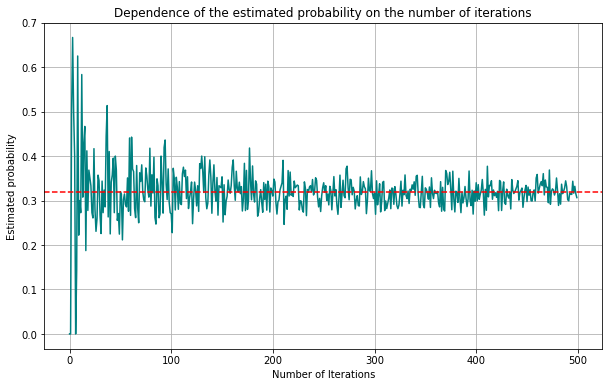

In [55]:
def buffon_needle_simulation(num_needles, needle_length, line_spacing):
    intersected = 0

    for _ in range(num_needles):
        # Generate a random angle between 0 and 180 degrees (in radians)
        angle = random.uniform(0, math.pi / 2)

        # Generate a random position for the midpoint of the needle
        mid_point = random.uniform(0, line_spacing / 2)

        # Check if the needle intersects a line
        if mid_point <= (needle_length / 2) * math.sin(angle):
            intersected += 1

    # Estimate the probability
    if intersected == 0:
        estimated_probability = 0
    else:
        estimated_probability = intersected / num_needles

    return estimated_probability

def compute_true_value(needle_length, line_spacing):
    true_value = (2 * needle_length) / (math.pi * line_spacing)
    return true_value


# Input parameters
needle_length = 1.0      # Length of the needle
line_spacing = 2.0       # Distance between the lines
max_num_needles = 500   # maximum number of needles to drop 

estimates = []

for num_needles in range(max_num_needles):
    estimated_probability = buffon_needle_simulation(num_needles, needle_length, line_spacing)
    estimates.append(estimated_probability)

# Compute the true value
true_value = compute_true_value(needle_length, line_spacing)


# Create a plot
plt.figure(figsize=(10, 6))
plt.plot(range(max_num_needles), estimates, color='teal')
plt.xlabel('Number of Iterations')
plt.ylabel('Estimated probability')
plt.axhline(y=true_value, color='red', linestyle='--', label='True Value')
plt.title('Dependence of the estimated probability on the number of iterations')
plt.grid(True)

# Show the plot
plt.show()

You can read more on the analytical solution of the version of this problem over a grid [here](https://mathworld.wolfram.com/Buffon-LaplaceNeedleProblem.html).

## Monte Carlo Tree Search

Monte Carlo Tree Search (MCTS) is a heuristic search algorithm used mainly in decision processes involving uncertainty and in particular in games. It's a popular algorithm for game-playing AI, especially in environments where the full breadth of possible moves can't be exhaustively explored due to computational constraints. Some remarkable recent applications of MCTS are [AlphaGo](https://blog.research.google/2016/01/alphago-mastering-ancient-game-of-go.html) and [AlphaZero](https://arxiv.org/pdf/1712.01815.pdf), where MCTS is combined with neural networks to determine the best next action.

## Monte Carlo Integration

Assume that we are able to generate independent samples $\theta^{(1)}, ..., \theta^{(M)}$ from the posterior distribution $p(\theta|x)$ of interest. A Monte Carlo estimate of the posterior mean

$$
\mathbb{E}(\theta |x) = \int \theta p(\theta|x)d\theta
$$

is given by 

$$
\hat{\mathbb{E}} (\theta |x) = \frac{1}{M} \sum_{m=1}^M \theta^{(m)}, \quad \theta^{(m)} \sim p(\theta|x).
$$

This approach is called <font color='orange'>Monte Carlo integration</font> and avoids the analytical integration. More generally, for any sortable function $g$,

$$
\hat{\mathbb{E}} (g(\theta |x)) = \frac{1}{M} \sum_{m=1}^M g(\theta^{(m)}), \quad \theta^{(m)} \sim p(\theta|x).
$$